# Introduction


**ASSIGNMENT DEADLINE: 4 Mar 2019 (MON) 17:00**

In this assignment we are going to code the build blocks for the convolutional neural network and put them together to train a CNN on the MNIST dataset.

**Attention**:
- *Only python3 is allowed to use in this assignment.*
- *We use `numpy` for storing variables and computation.*
- *You do not need a GPU to for this assignment. CPU is enough.*
- *To run this Jupyter notebook, you need to install the depedent libraries as stated in [README.MD](README.MD).*
- *Keras version should be >=2.1.2.*
- *Please do not run this whole file before you implement all the codes. Otherwise some errors will occur.*
- *Please do not change the inputs values of the functions needing to be implemented, otherwise your implementation may be wrong by our code tesing*
- *After you implement one function, remember to restart the notebook kernel to help it recognize your fresh code*
- *Please do not change the structure of files in the whole folder of this assignment, otherwise TA may mark your code wrongly*

For each layer, we will implement a forward and a backward function belonging to corresponding operation class in [nn/operations.py](nn/operations.py), such as `conv` layer corresponds to `conv` operation. The forward function will receive inputs and will return the outputs of this layer(loss layer will be a little different), like this one:

```python
def fc_forward(input, weights, bias):
    """
    # Arguments
        input: numpy array with shape (batch, in_features)
        weights: numpy array with shape (in_features, out_features)
        bias: numpy array with shape (out_features)

    # Returns
        output: numpy array with shape(batch, out_features)
    """
    output = None
    # after some computation
    return output
```

The backward pass will receive upstream derivatives and inputs, and will return gradients with respect to the input and associated parameters, like this one:

```python
def fc_backward(out_grad, input, weights, bias):
    """
    # Arguments
        out_grad: gradient to the forward output of fc layer, with shape (batch, out_features)
        input: numpy array with shape (batch, in_features)
        weights: numpy array with shape (in_features, out_features)
        bias: numpy array with shape (out_features)

    # Returns
        in_grad: gradient to the forward input of fc layer, with same shape as input
        w_grad: gradient to weights, with same shape as weights
        b_bias: gradient to bias, with same shape as bias
    """
    in_grad = None
    w_grad = None
    b_grad = None
    # after some computation
    return in_grad, w_grad, b_grad
```

After implementing a bunch of functions of different layers in this way, we will be able to combine them to build classifiers with different architectures.

This iPython notebook serves to:

- explain the questions
- explain the function APIs and implementation examples (like `ReLU` and `FC`) 
- provide helper functions to piece functions together and check your code

You can type `jupyter lab` in the terminal to start this jupyter notebook while you are in the folder containing this file. It's much more convinient than jupyter notebook.

# ReLU layer
A convolution layer is usually followed by a non-linear activation function. We will provide the functions `relu_forward` and `relu_backward` in [nn/operations.py](nn/operations.py) as an implementation example. Read through the function code and make sure you understand the derivation. The following is the explanation for the implementation of `ReLU` by using formula. You need to write down other layers' forward and backward formulations in your reports.

## Forward Formulation
Given input $x \in R^{B \times C \times H \times W}$ ($B$:batch size, $C$: number of channel, $H$: input height, $W$: input width),  output $y \in R^{B \times C \times H \times W}$ can be caculated as:

\begin{equation*}
y=idicator(x) \times x
\end{equation*}

Here, $indicator(x)$ return the same size of input $x$, comparing $x$ with 0 element-wisely. If $x_{i,j,k,l} \geq 0$ return $z_{i,j,k,l}=1$. And the multiplication $\times$ is also element-wise. If the input $x$ has only 2 dimensions, i.e. the batch dimension and the feature dimension, e.g. after the FC layer, the subscripts $j,k,l$ in the formula are merged into single $j$.

## Backward Formulation
Given input $x \in R^{B \times C \times H \times W}$ ($B$:batch size, $C$: number of channel, $H$: input height, $W$: input width) and gradients to output of this layer $dy \in R^{B \times C \times H \times W}$, gradients to input $dx$ will be caculated like this:

\begin{equation*}
dx=idicator(x) \times dy
\end{equation*}

# FC Layer

FC layer (short for fully connected layer) is also called linear layer or dense layer.

In the file [nn/layers.py](nn/layers.py), the class `FCLayer` will be initialized with `in_features`, `out_features`, and `name`, shown as below:
```python
class FCLayer(Layer):
    def __init__(self, in_features, out_features, name='fclayer', initializer=Guassian()):
        super(FCLayer, self).__init__(name=name)
        self.trainable = True

        self.weights = initializer.initialize((in_features, out_features))
        self.bias = np.zeros(out_features)

        self.w_grad = np.zeros(self.weights.shape)
        self.b_grad = np.zeros(self.bias.shape)
```

- `in_features`: The number of inputs features
- `out_features`: The numbet of required outputs features

## Forward Formulation
Given input $x \in R^{B \times N}$ ($B$:batch size, $C$: number of input neurons), weights $w \in R^{N \times N'}$ and bias $b \in R^{N'}$ ($N'$: number of output neurons), output $y \in R^{B \times N'}$ can be caculated as:

\begin{equation*}
y_i = x_i \cdot w+b
\end{equation*}

where $x_i$ and $y_i$ are input and output features of $i$-th sample in one batch ($i \in \{1,2,\cdots,B\}$) and $\cdot$ is matrix multiplication.

## Backward Formulation
Given input $x \in R^{B \times N}$ ($B$:batch size, $C$: number of input neurons), gradient to output $dy \in R^{B \times N'}$, weights $w \in R^{N \times N'}$ and bias $b \in R^{N'}$ ($N'$: number of output neurons),  gradient to input $dx$ can be caculated as:

\begin{equation*}
dx_i = dy_i \cdot w^T
\end{equation*}

where $w^T$ is the transpose of $w$. And gradient to weights $dw$ and bias $db$ can be calculated as:

\begin{equation*}
dw = x^T \cdot dy
\end{equation*}

\begin{equation*}
db = \sum_{i}dy_i
\end{equation*}

where the sum of $dy_i$ is the element-wise summation.

# Covolution Layer
In the file [nn/layers.py](nn/layers.py), the class `Convolution` will be initialized with `conv_params`, `initializer` and `name`, shown as below:
```python
class Convolution(Layer):
    def __init__(self, conv_params, initializer=Guassian(), name='conv'):
        super(Convolution, self).__init__(name=name)
        self.trainable = True
        self.conv_params = conv_params

        self.weights = initializer.initialize(
            (conv_params['out_channel'], conv_params['in_channel'], conv_params['kernel_h'], conv_params['kernel_w']))
        self.bias = np.zeros((conv_params['out_channel']))

        self.w_grad = np.zeros(self.weights.shape)
        self.b_grad = np.zeros(self.bias.shape)

```

`conv_params` is a dictionary, containing these parameters:

- 'kernel_h': The height of kernel.
- 'kernel_w': The width of kernel.
- 'stride': The number of pixels between adjacent receptive fields in the horizontal and vertical directions.
- 'pad': The number of pixels padded to the bottom, top, left and right of each feature map. **Here, `pad=2` means a 2-pixel border of padded with zeros**.
- 'in_channel': The number of input channels.
- 'out_channel': The number of output channels.

`initializer` is an instance of Initializer class, used to initialize parameters

## Forward
In the file [nn/operations.py](nn/operations.py), implement the forward pass for a convolutional layer in the function `conv_forward`.

The input consists of N data points, each with C channels, height H and width W. We convolve each input with K different kernels, where each filter spans all C channels and has height HH and width WW.

**WARNING:** Please implement the matrix product method of convolution as shown in Lecture notes. The naive version of implementing a sliding window will be too slow when you try to train the whole CNN in later sections.

You can test your implementation by restarting jupyter notebook kernel and running the following:

In [1]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from nn.layers import Convolution
from utils.tools import rel_error

from keras import Sequential
from keras.layers import Conv2D

input = np.random.uniform(size=(10, 3, 30, 30))
params = { 
    'kernel_h': 5,
    'kernel_w': 5,
    'pad': 0,
    'stride': 2,
    'in_channel': input.shape[1],
    'out_channel': 64,
}
conv = Convolution(params)
out = conv.forward(input)

keras_conv = Sequential([
    Conv2D(filters=params['out_channel'],
            kernel_size=(params['kernel_h'], params['kernel_w']),
            strides=(params['stride'], params['stride']),
            padding='valid',
            data_format='channels_first',
            input_shape=input.shape[1:]),
])
keras_conv.layers[0].set_weights([conv.weights.transpose((2,3,1,0)), conv.bias])

keras_out = keras_conv.predict(input, batch_size=input.shape[0])
print('Relative error (<1e-6 will be fine): ', rel_error(out, keras_out))

ModuleNotFoundError: No module named 'keras'

## Backward
Implement the backward pass for the convolution operation in the function `conv_backward` in the file [nn/operations.py](nn/operations.py). 

When you are done, restart jupyter notebook and run the following to check your backward pass with a numeric gradient check. 

In gradient checking, to get an approximate gradient for a parameter, we vary that parameter by a small amount (while keeping rest of parameters constant) and note the difference in the network loss. Dividing the difference in network loss by the amount we varied the parameter gives us an approximation for the gradient. We repeat this process for all the other parameters to obtain our numerical gradient. Note that gradient checking is a slow process (2 forward propagations per parameter) and should only be used to check your backpropagation!

More links on gradient checking:

http://ufldl.stanford.edu/tutorial/supervised/DebuggingGradientChecking/

https://www.coursera.org/learn/machine-learning/lecture/Y3s6r/gradient-checking

In [2]:
from nn.layers import Convolution
import numpy as np
from utils.check_grads import check_grads_layer

batch = 10
conv_params={
    'kernel_h': 3,
    'kernel_w': 3,
    'pad': 0,
    'stride': 2,
    'in_channel': 3,
    'out_channel': 10
}
in_height = 10
in_width = 20
out_height = 1+(in_height+2*conv_params['pad']-conv_params['kernel_h'])//conv_params['stride']
out_width = 1+(in_width+2*conv_params['pad']-conv_params['kernel_w'])//conv_params['stride']

input = np.random.uniform(size=(batch, conv_params['in_channel'], in_height, in_width))
out_grad = np.random.uniform(size=(batch, conv_params['out_channel'], out_height, out_width))

conv = Convolution(conv_params)
check_grads_layer(conv, input, out_grad)

Gradient to input: correct
Gradient to weights:  correct
Gradient to bias:  correct


# Pooling Layer
In the file [nn/layers.py](nn/layers.py), the class `Pooling` will be initialized with `pool_params`, and `name`, shown as below:
```python
class Pooling(Layer):
    def __init__(self, pool_params, name='pooling'):
        super(Pooling, self).__init__(name=name)
        self.pool_params = pool_params
```

`pool_params` is a dictionary, containing these parameters:
- 'pool_type': The type of pooling, 'max' or 'avg'
- 'pool_h': The height of pooling kernel.
- 'pool_w': The width of pooling kernel.
- 'stride': The number of pixels between adjacent receptive fields in the horizontal and vertical directions.
- 'pad': The number of pixels that will be used to zero-pad the input in each x-y direction. **Here, `pad=2` means a 2-pixel border of padding with zeros**.

## Forward
Implement the forward pass for the pooling operation in the function `pool_forward` in the file [nn/operations.py](nn/operations.py).

You can test your implementation by restarting jupyter notebook kernel and running the following:

In [3]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from nn.layers import Pooling
from utils.tools import rel_error

from keras import Sequential
from keras.layers import MaxPooling2D

input = np.random.uniform(size=(10, 3, 30, 30))
params = { 
    'pool_type': 'max',
    'pool_height': 5,
    'pool_width': 5,
    'pad': 0,
    'stride': 2,
}
pool = Pooling(params)
out = pool.forward(input)

keras_pool = Sequential([
    MaxPooling2D(pool_size=(params['pool_height'], params['pool_width']),
                 strides=params['stride'],
                 padding='valid',
                 data_format='channels_first',
                 input_shape=input.shape[1:])
])
keras_out = keras_pool.predict(input, batch_size=input.shape[0])
print('Relative error (<1e-6 will be fine): ', rel_error(out, keras_out))

Relative error (<1e-6 will be fine):  7.765089357185624e-09


## Backward
Implement the backward pass for the max-pooling operation in the function `pool_backward` in the file [nn/operations.py](nn/operations.py).

You can test your implementation by restarting jupyter notebook kernel and running the following:

In [4]:
from nn.layers import Pooling
import numpy as np
from utils.check_grads import check_grads_layer

batch = 10
pool_params={
    'pool_type': 'max',
    'pool_height': 2,
    'pool_width': 3,
    'stride': 2,
    'pad': 0
}
in_height = 10
in_width = 10
in_channel = 10
out_height = 1+(in_height-pool_params['pool_height']+2*pool_params['pad'])//pool_params['stride']
out_width = 1+(in_width-pool_params['pool_width']+2*pool_params['pad'])//pool_params['stride']

input = np.random.uniform(size=(batch, in_channel, in_height, in_width))
out_grads = np.random.uniform(size=(batch, in_channel, out_height, out_width))
pool = Pooling(pool_params)
check_grads_layer(pool, input, out_grads)

Gradient to input: correct


# Dropout Layer
Dropout [1] is a technique for regularizing neural networks by randomly setting some features to zero during the forward pass. In this exercise you will implement a dropout layer and modify your fully-connected network to optionally use dropout.

[1] Geoffrey E. Hinton et al, "Improving neural networks by preventing co-adaptation of feature detectors", arXiv 2012

In the file `layers.py`, the class `Dropout` will be initialized with `rate`, `seed` and `name`, shown as below:
```python
class Dropout(Layer):
    def __init__(self, rate, name='dropout', seed=None):
        super(Dropout, self).__init__(name=name)
        self.rate = rate
        self.mask = None
        self.seed = seed
```

- `ratio`: The probability of setting a neuron to zero
- `seed`: seed: int, random seed to sample from input, so as to get mask, which is convenient to check gradients. But for real training, it should be None to make sure to randomly drop neurons

## Forward
In the file [nn/operations.py](nn/operations.py), implement the forward pass for dropout. Since dropout behaves differently during training and testing, make sure to implement the operation for both modes.  `p` refers to the probability of setting a neuron to zero. We will follow the Caffe convention where we multiply the outputs by `1/(1-p)` during training. 

## Backward
In the file [nn/operations.py](nn/operations.py), implement the backward pass for dropout. After doing so, restart jupyter notebook and run the following cell to numerically gradient-check your implementation.

In [7]:
from nn.layers import Dropout

import numpy as np
from utils.check_grads import check_grads_layer

rate = 0.1
batch = 2
height = 10
width = 20
channel = 10

np.random.seed(1234)
input = np.random.uniform(size=(batch, channel, height, width))
out_grads = np.random.uniform(size=(batch, channel, height, width))

dropout = Dropout(rate, seed=1234)
dropout.set_mode(True)
check_grads_layer(dropout, input, out_grads)

Gradient to input: correct


# SoftmaxCrossEntropy Loss
We write Softmax and CrossEntropy together because it can avoid some numeric overflow problem. In the file `loss.py`, the class `SoftmaxCrossEntropy` will be initialized with `num_class`,  shown as below:
```python
class SoftmaxCrossEntropy(Loss):
    def __init__(self, num_class):
        super(SoftmaxCrossEntropy, self).__init__()
        self.num_class = num_class
```

`num_class`: The number of category

## Forward
Implement the forward pass for the pooling operation in the function `softmax_cross_entropy_forward` of in the file [nn/operations.py](nn/operations.py).

You can test your implementation by restarting jupyter notebook kernel and running the following:

In [8]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from nn.loss import SoftmaxCrossEntropy
from utils.tools import rel_error

from keras import backend as K

batch = 10
num_class = 10
input = np.random.uniform(size=(batch, num_class))
labels = np.random.randint(num_class, size=batch)

loss = SoftmaxCrossEntropy(num_class)
out, _ = loss.forward(input, labels)

keras_input = K.softmax(input)
keras_labels = np.zeros(input.shape, dtype='int')
for i in range(batch):
        keras_labels[i, labels[i]] = 1
keras_out = K.mean(K.categorical_crossentropy(keras_labels, keras_input, from_logits=False))
print('Relative error (<1e-6 will be fine): ', rel_error(out, K.eval(keras_out)))

Relative error (<1e-6 will be fine):  3.11338959470769e-14


## Backward
In the file [nn/operations.py](nn/operations.py), implement the backward pass for `SodtmaxCrossEntropy`. After doing so, restart jupyter notebook and run the following cell to numerically gradient-check your implementation.

In [9]:
from nn.loss import SoftmaxCrossEntropy
import numpy as np
from utils.check_grads import check_grads_loss

batch = 10
num_class = 10
input = np.random.uniform(size = (batch, num_class))
labels = np.random.randint(num_class, size = (batch))

crossentropy = SoftmaxCrossEntropy(num_class)
check_grads_loss(crossentropy, input, labels)

Gradient to input: correct


# Optimizer
In the file [nn/optimizers.py](nn/optimizers.py), there are 4 types of optimizer (`SGD`, `Adam`, `RMSprop` and `Adagrad`). You only need to implement the `update` function of `Adam`. `Adam` optimizer is initialized like this:

```python
class Adam(Optimizer):
    def __init__(self, lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0, sheduler_func=None):
        super(Adam, self).__init__(lr)
        self.beta_1 = beta_1
        self.beta_2 = beta_2
        self.epsilon = epsilon
        self.decay = decay
        if not self.epsilon:
            self.epsilon = 1e-8
        self.moments = None
        self.accumulators = None
        self.sheduler_func = sheduler_func
```

- `lr`: The initial learning rate.
- `decay`: The learning rate decay ratio
- `sheduler_func`: Function to change learning rate with respect to iterations

More details can be seen in reference.

**For you reference:**
http://cs231n.github.io/neural-networks-3/#update

# Train the net on full MNIST data
By training the `MNISTNet` for one epoch, you should achieve above 90% on test set. You may have to wait about 5 minutes for training to be completed.

Number of training images:  48000
Number of validation images:  12000
Number of testing images:  10000

Four examples of training images:


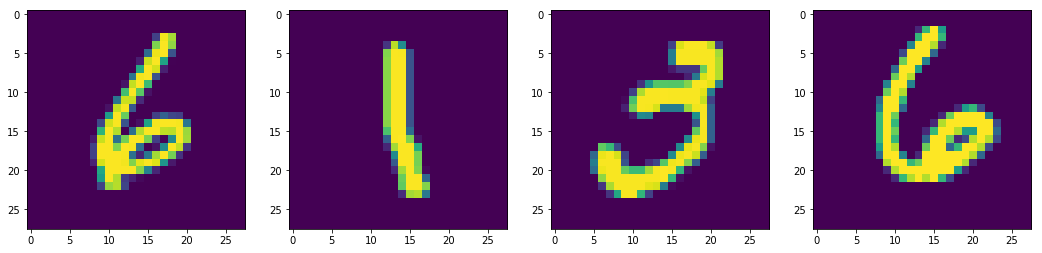

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
from models.MNISTNet import MNISTNet
from nn.loss import SoftmaxCrossEntropy, L2
from nn.optimizers import Adam
from utils.datasets import MNIST
import numpy as np

mnist = MNIST()
mnist.load()
idx = np.random.randint(mnist.num_train, size=4)
print('\nFour examples of training images:')
img = mnist.x_train[idx][:,0,:,:]

plt.figure(1, figsize=(18, 18))
plt.subplot(1, 4, 1)
plt.imshow(img[0])
plt.subplot(1, 4, 2)
plt.imshow(img[1])
plt.subplot(1, 4, 3)
plt.imshow(img[2])
plt.subplot(1, 4, 4)
plt.imshow(img[3])

In [ ]:
model = MNISTNet()
loss = SoftmaxCrossEntropy(num_class=10)

# define your learning rate sheduler
def func(lr, iteration):
    if iteration % 1000 ==0:
        return lr*0.5
    else:
        return lr

adam = Adam(lr=0.001, decay=0,  sheduler_func = func)
l2 = L2(w=0.001) # L2 regularization with lambda=0.001
model.compile(optimizer=adam, loss=loss, regularization=l2)

import time
start = time.time()
train_results, val_results, test_results = model.train(
    mnist, 
    train_batch=30, val_batch=1000, test_batch=1000, 
    epochs=2, 
    val_intervals=-1, test_intervals=500, print_intervals=100)
print('cost:', time.time()-start)

Epoch 0: 
Train iter 100/1600:	acc 0.10, loss 2.30, reg loss 0.00, speed 557.96 imgs/sec
Train iter 200/1600:	acc 0.10, loss 2.31, reg loss 0.00, speed 463.05 imgs/sec
Train iter 300/1600:	acc 0.20, loss 2.28, reg loss 0.00, speed 469.70 imgs/sec
Train iter 400/1600:	acc 0.60, loss 1.04, reg loss 0.01, speed 373.73 imgs/sec
Test acc 0.71, loss 0.90
Train iter 500/1600:	acc 0.80, loss 0.74, reg loss 0.02, speed 185.09 imgs/sec
Train iter 600/1600:	acc 0.63, loss 1.34, reg loss 0.03, speed 439.38 imgs/sec
Train iter 700/1600:	acc 0.63, loss 1.01, reg loss 0.03, speed 560.40 imgs/sec
Train iter 800/1600:	acc 0.87, loss 0.36, reg loss 0.04, speed 505.32 imgs/sec
Train iter 900/1600:	acc 0.90, loss 0.21, reg loss 0.04, speed 481.34 imgs/sec
Test acc 0.92, loss 0.26
Train iter 1000/1600:	acc 0.87, loss 0.42, reg loss 0.05, speed 181.70 imgs/sec
Train iter 1100/1600:	acc 0.97, loss 0.12, reg loss 0.05, speed 572.65 imgs/sec
Train iter 1200/1600:	acc 0.97, loss 0.18, reg loss 0.05, speed 552.9

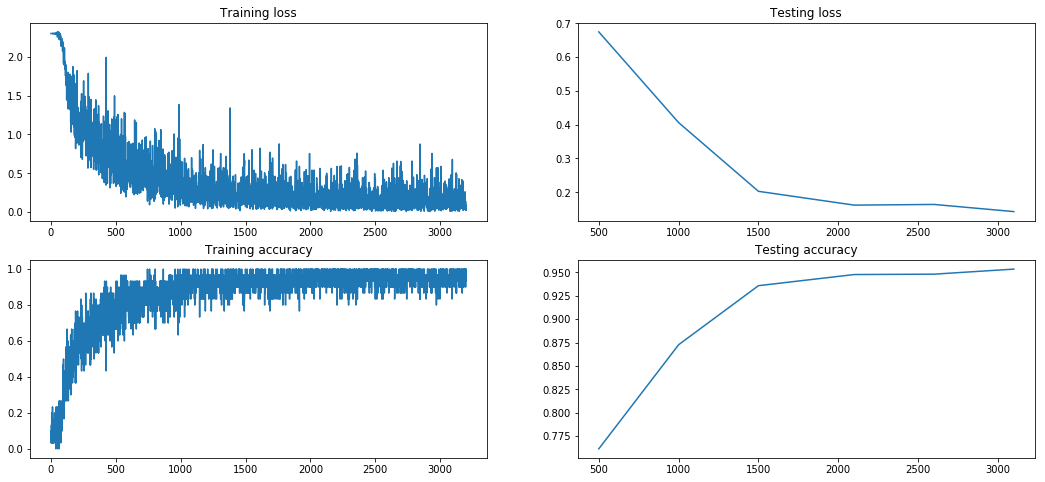

In [11]:
plt.figure(figsize=(18, 8))
plt.subplot(2, 2, 1)
plt.title('Training loss')
plt.plot(train_results[:,0], train_results[:,1])
plt.subplot(2, 2, 3)
plt.title('Training accuracy')
plt.plot(train_results[:,0], train_results[:,2])
plt.subplot(2, 2, 2)
plt.title('Testing loss')
plt.plot(test_results[:,0], test_results[:, 1])
plt.subplot(2, 2, 4)
plt.title('Testing accuracy')
plt.plot(test_results[:, 0], test_results[:,2])

## Change of learning rate
If we change the initial learning rate from 0.001 to 0.1, the training process becomes unstable and the loss is out of control. Thus, you need to be careful when setting the initial learning rate.

In [2]:
model = MNISTNet()
loss = SoftmaxCrossEntropy(num_class=10)

# define your learning rate sheduler
def func(lr, iteration):
    if iteration % 1000 ==0:
        return lr*0.5
    else:
        return lr

adam = Adam(lr=0.01, decay=0,  sheduler_func = func)
l2 = L2(w=0.001) # L2 regularization with lambda=0.001
model.compile(optimizer=adam, loss=loss, regularization=l2)
train_results, val_results, test_results = model.train(
    mnist, 
    train_batch=30, val_batch=1000, test_batch=1000, 
    epochs=2, 
    val_intervals=-1, test_intervals=500, print_intervals=100)

Epoch 0: 
Train iter 100/1600:	acc 0.60, loss 1.07, reg loss 0.09, speed 595.34 imgs/sec
Train iter 200/1600:	acc 0.73, loss 0.78, reg loss 0.15, speed 533.08 imgs/sec
Train iter 300/1600:	acc 0.67, loss 0.85, reg loss 0.16, speed 574.20 imgs/sec
Train iter 400/1600:	acc 0.90, loss 0.28, reg loss 0.15, speed 584.90 imgs/sec
Test acc 0.89, loss 0.34
Train iter 500/1600:	acc 0.83, loss 0.41, reg loss 0.15, speed 241.58 imgs/sec
Train iter 600/1600:	acc 0.87, loss 0.46, reg loss 0.13, speed 689.69 imgs/sec
Train iter 700/1600:	acc 0.87, loss 0.40, reg loss 0.12, speed 704.82 imgs/sec
Train iter 800/1600:	acc 0.90, loss 0.35, reg loss 0.12, speed 657.73 imgs/sec
Train iter 900/1600:	acc 0.90, loss 0.60, reg loss 0.11, speed 637.85 imgs/sec
Test acc 0.90, loss 0.31
Train iter 1000/1600:	acc 0.97, loss 0.11, reg loss 0.11, speed 231.36 imgs/sec
Train iter 1100/1600:	acc 0.93, loss 0.28, reg loss 0.10, speed 700.88 imgs/sec
Train iter 1200/1600:	acc 1.00, loss 0.04, reg loss 0.09, speed 682.3

In [1]:
plt.figure(figsize=(18, 8))
plt.subplot(2, 2, 1)
plt.title('Training loss')
plt.plot(train_results[:,0], train_results[:,1])
plt.subplot(2, 2, 3)
plt.title('Training accuracy')
plt.plot(train_results[:,0], train_results[:,2])
plt.subplot(2, 2, 2)
plt.title('Testing loss')
plt.plot(test_results[:,0], test_results[:, 1])
plt.subplot(2, 2, 4)
plt.title('Testing accuracy')
plt.plot(test_results[:, 0], test_results[:,2])

NameError: name 'plt' is not defined

# Train your best MNISTNet!
Tweak the hyperparameters of the above MNISTNet and use what you've learnt to train the best net.

Marks will be given based on your test accuracy, your explanations/insights of the training. The network is small, hence the training should finish quickly using your CPU (less than 1 hour). 

Please report the following:
- Training and testing loss as well as accuracy over iterations
- Architecture and training method (eg. optimization scheme, data augmentation): explain your design choices, what has failed and what has worked and why you think they worked/failed
- Try different hyper-parameters, e.g. rate decaying, weight decay, number of layers and total number of epochs. 

**DO NOT** use external libraries like Tensorflow, keras and Pytorch in your implementation, i.e. optimizer.py, layer.py and loss.py. **DO NOT** copy the code from the internet, e.g. github. We have offered all materials that you can refer to in this notebook.

# Final submission instructions
Please submit the following:

1) Your code files in a folder named `codes`, and keep the structure of all files in this folder same as this assignment.

2) A short report (1-2 pages) in pdf titled `report.pdf`, explaining the logic (expressed using mathematical formulation) of your implementation (including the forward and backward function like ReLU) and the findings from training your best net. It should be outside of `codes` folder.

**ASSIGNMENT DEADLINE: 4 Mar 2019 (MON) 17:00**

Do not include the `data` folder as it takes up substantial memory. Please zip up the following folders under a folder named with your NUSNET ID: eg. `e0123456g.zip` and submit the zipped folder to IVLE/workbin/assignment 1 submission. If unzip the file, the structure should be like this:

```bash
e0123456g/
    codes/
        models/
            ...
        nn/
            ...
        utils/
            ...
        main.ipynb
        README.MD
    report.pdf
```